In [4]:
import networkx as nx
import random
import math
%matplotlib inline

In [5]:
def red_barabasi(t, m, G):
    m = m0 - 1
    for i in range (m0, t+m0):
        G.add_node(i) # primero se aniade el nodo
        grados = nx.degree(G)
        probabilidades = {}
        sumGrados = 0
        for j in range (0, i):
            sumGrados += G.degree(j)
        
        for nodo in range (0, i):
            probabilidades[nodo] = (float)(grados[nodo])/sumGrados #aplicamos formula para coger probabilidades
            
        #print('Probabilidades')
        #print(probabilidades)
        probabilidadesAcumuladas = []
        anterior = 0
    
        for node, prob in probabilidades.items():
            elemento = [node, anterior + prob]
            probabilidadesAcumuladas.append(elemento)
            anterior = anterior + prob
        
        #print('Probabilidades acumuladas')
        #print(probabilidadesAcumuladas)
        aristasPuestas = 0
        nuevasAristas = []
        nodosDestino = []
        
        while(aristasPuestas < m):
            r = random.random()
            k = 0
            # con 1 se refiere al valor de prob del k nodo
            while(probabilidadesAcumuladas[k][1] < r and k < i):
                k = k + 1
            nodoDestino = probabilidadesAcumuladas[k][0]
            if nodoDestino in nodosDestino:
                continue
           
            nodosDestino.append(nodoDestino)
            G.add_edge(i, nodoDestino)
            nuevasAristas.append((i, nodoDestino))
            aristasPuestas += 1
            
            
        #print(nuevasAristas)
        
    
    
    return G

Introduce num nodos 1894
Introduce m 9


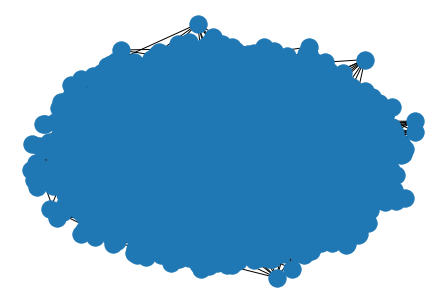

In [10]:
nodos = int(input("Introduce num nodos "))
m = int(input("Introduce m "))
m0 = m + 1
G = nx.complete_graph(m0)
t = nodos - m0
G = red_barabasi(t, m, G)
nx.draw(G)

In [12]:
#hacemos la lista de nodos para que gephi pueda leer el archivo correctamente
f=open("node_list.csv","w", encoding = "utf-8")
f.write("ID\tLabel\n")
cont=0
mapa = {}
for n in G.nodes():
    f.write(str(cont) + "\t" + str(n) + "\n")
    mapa[n] = cont
    cont = cont + 1
f.close()  

In [13]:
#hacemos la lista de aristas para que gephi pueda leer el archivo correctamente
f=open("edge_list.csv","w", encoding = "utf-8")
f.write("Source\tTarget\n")
for e in G.edges():
    f.write(str(mapa[e[0]]) + "\t" + str(mapa[e[1]]) + "\n")
f.close()